### Introdução à plotagem

Objetivos:
- matplotlib
- seaborn
- Plotagem no Panda

Para trabalhar com a visualização de dados utilizaremos o conjunto de **Anscombe** presente na biblioteca **seaborn**<br>
[https://seaborn.pydata.org/](https://seaborn.pydata.org/)

In [1]:
# importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Conjunto de dados de Anscombe
anscombe = sns.load_dataset("anscombe")
# print(anscombe)

In [3]:
# Cria um subconjunto dos dados
# Contém somente o primeiro conjunto de dados de Anscombe
dataset_1 = anscombe[anscombe["dataset"] == "I"]
# dataset_1


In [4]:
# Poltar o gráfico referente ao primeiro conjunto de dados de anscombe
# plt.plot(dataset_1["x"], dataset_1["y"])

Por padrão `plt.plot()` desenhará linhas, se quisermos alterar basta passar o padrão desejado

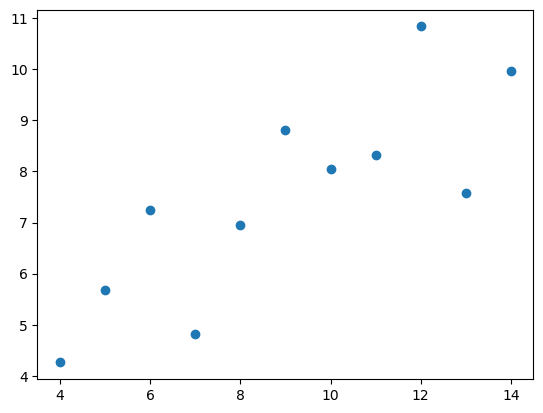

In [5]:
plt.plot(dataset_1["x"], dataset_1["y"], "o")

In [6]:
# Repetir o processo para os demais dataset
dataset_2 = anscombe[anscombe["dataset"] == "II"]
dataset_3 = anscombe[anscombe["dataset"] == "III"]
dataset_4 = anscombe[anscombe["dataset"] == "IV"]

Ao invés de fazermos plotagem individuais podemos realizar subplotagens de vários gráficos juntos

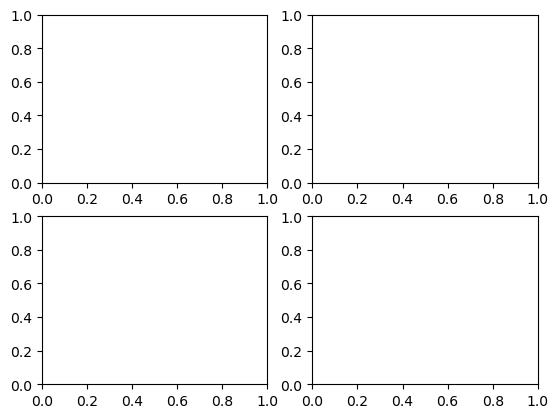

In [7]:
# Cria toda a figura na qual subplotagens serão inseridas
fig = plt.figure()

# Diz aá figura com as subplotagens deverão ser dispostas no exemplo,
# teremos 2 linhas de plotagens, e cada llinha terá 2 plotagens
# a subplotagem tem 2 linhas e 2 e 2 colunas, local 1 da plotagem
axes1 = fig.add_subplot(2, 2, 1)

# a subplotagem tem 2 linhas e 2 e 2 colunas, local 2 da plotagem
axes2 = fig.add_subplot(2, 2, 2)

# a subplotagem tem 2 linhas e 2 e 2 colunas, local 3 da plotagem
axes3 = fig.add_subplot(2, 2, 3)

# a subplotagem tem 2 linhas e 2 e 2 colunas, local 4 da plotagem
axes4 = fig.add_subplot(2, 2, 4)


Podemos usar o método `plot` em que cada eixo para criar a plotagem

In [8]:
# Adiciona um plotagem em cada um dos eixos criados
axes1.plot(dataset_1["x"], dataset_1["y"], "o")
axes2.plot(dataset_2["x"], dataset_2["y"], "o")
axes3.plot(dataset_3["x"], dataset_3["y"], "o")
axes4.plot(dataset_4["x"], dataset_4["y"], "o")

Colocar rótulo e usar `tight_layout` para garantir que os eixos estejam separados. Atençã

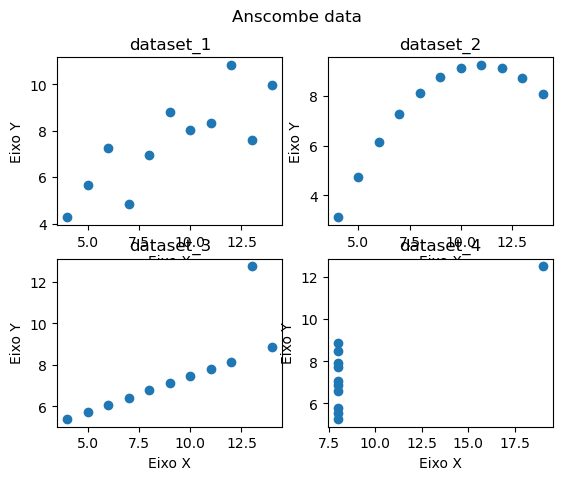

In [9]:
# %matplotlib notebook

# %matplotlib inline

# Acrescentar título
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

axes1.set_xlabel("Eixo X")
axes1.set_ylabel("Eixo Y")

axes2.set_xlabel("Eixo X")
axes2.set_ylabel("Eixo Y")

axes3.set_xlabel("Eixo X")
axes3.set_ylabel("Eixo Y")

axes4.set_xlabel("Eixo X")
axes4.set_ylabel("Eixo Y")

# Adicionar um título para toda a figura
fig.suptitle("Anscombe data")


# Usa um layout organizado
# fig.tight_layout()
fig

# plt.show()

### Gráficos estatísticos usando o matplotlib

In [10]:
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


#### Histrograma
O método `hist()` utilizado abaixo é usando para criar histograma, os quais tem o objetivo de criar um gráfico de distribuição de acordo com a frequência

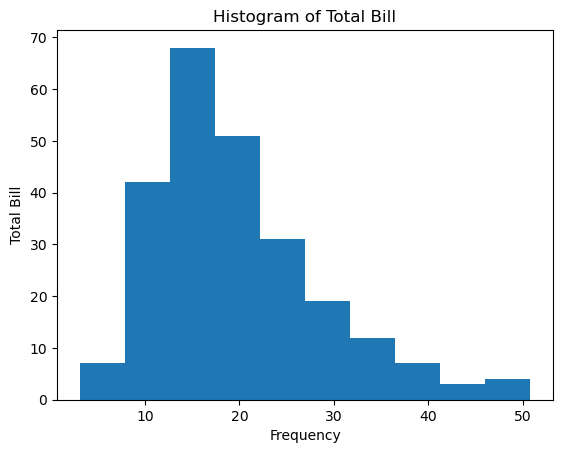

In [11]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1) # Cria a janela
axes1.hist(tips["total_bill"], bins=10) # Inclui no axes1 a serie correspondente a total_bill
axes1.set_title("Histogram of Total Bill") # Inclui título ao gráfico
axes1.set_xlabel("Frequency")
axes1.set_ylabel("Total Bill")
plt.show()

#### Bivariado
Refere-se a gráficos de duas variáveis

Gráfico de dispersão (scatterplost) são usados quando uma variável é continua plotada em realação a outra variável contínua

Text(0, 0.5, 'Tip')

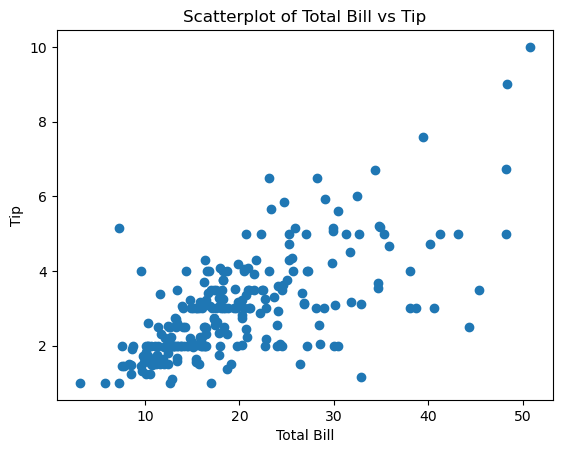

In [12]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips["total_bill"], tips["tip"])
axes1.set_title("Scatterplot of Total Bill vs Tip")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")
# scatter_plot.show()

**Gráfico de caixa**: são usados quando uma varável é plotada em relação a outra variável contínua

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

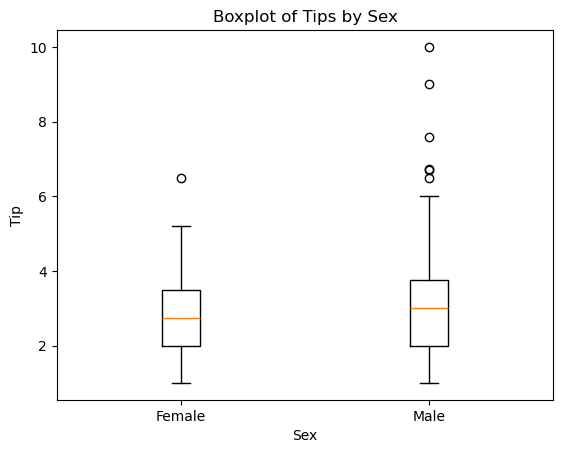

In [13]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot(
    # O primeiro argumento de um gráfico de caixa é o dado,
    # pois estamos plotando várias porções de dados;
    # temos que colocar cada porção de dados em uma lista
    [tips[tips["sex"] == "Female"]["tip"],
     tips[tips["sex"] == "Male"]["tip"]],
     # podemos então passar um parâmetro labels opcional
     # para especificar um rótulo aos dados que passamos
     tick_labels=["Female", "Male"]) # labels foi alterado para tick_labels
axes1.set_xlabel("Sex")
axes1.set_ylabel("Tip")
axes1.set_title("Boxplot of Tips by Sex")
# boxplot.show()

### Dados Multivariados
Plotar gráficos com multiplas variáveis não é tarefa simples e também não possui uma regra.<br>
Para isso podemos usar técnica para diferenciar os pontos, como cor, tamanho ou transparência (principalmente para áreas).<br>
Para escolhar a paleta de cor o matplolib e o seaborn utilizam a ferramenta **colorbrewer**

Text(0, 0.5, 'Tip')

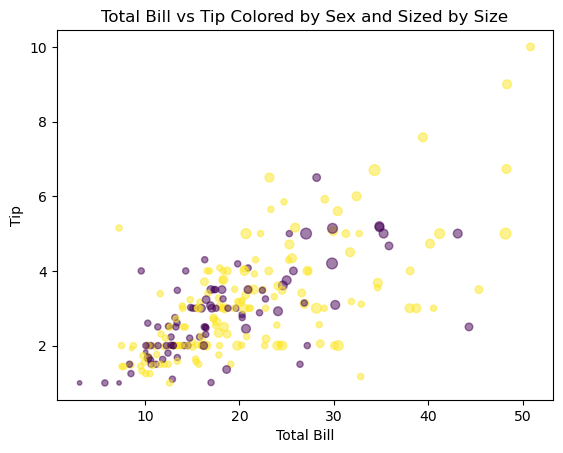

In [14]:
# Usa uma variável de cor baseada no sexo
# Poderia converter essa função para lambda -> recode_sex = lambda sex: 0 if sex == "Female" else 1
def recode_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1

tips["sex_color"] = tips["sex"].apply(recode_sex) # O método apply é usado para alterar um dados no dataframe

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x = tips["total_bill"],
    y = tips["tip"],

    # define o tamanho dos pontos com base no tamanho dos grupos;
    # multiplicamos os valores por 10 para deixar os pontos maiores
    # e enfatizar as diferenças
    s = tips["size"] * 10,

    # define a cor para o sexo
    c = tips["sex_color"],

    # define o valor de alpha para que os pontos sejam mais transparentes;
    # isso ajuda no caso de pontos que se sobrepõem

    alpha = 0.5)
axes1.set_title("Total Bill vs Tip Colored by Sex and Sized by Size")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")



### Seaborn
Seaborn é baseado no matplotlib e possui recursos de visualizalção mais bonitoas e complexas com menos linha de código. Além disso, **Seaborn** está 
altamente integrado ao Pandas e ao restante da pilha PyData

#### Univariado

A função sns.distplot, é um atalho para criar ojetos separdos de figuras e adicionar subplotagens individuais (eixos) à figura

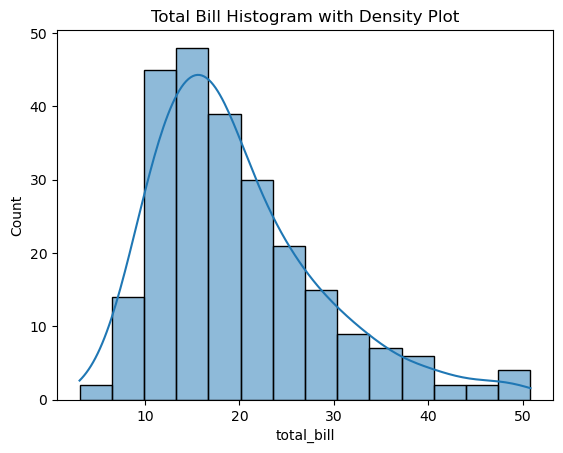

In [39]:
tips = sns.load_dataset("tips")

hist, ax = plt.subplots() # Hist é a figura total, ax é a área do gráfico
sns.histplot(tips["total_bill"], kde=True, ax=ax)
ax.set_title("Total Bill Histogram with Density Plot")
plt.show()

Se quesermos somente o histograma podemos definir o parâmetro **kde** como falso.

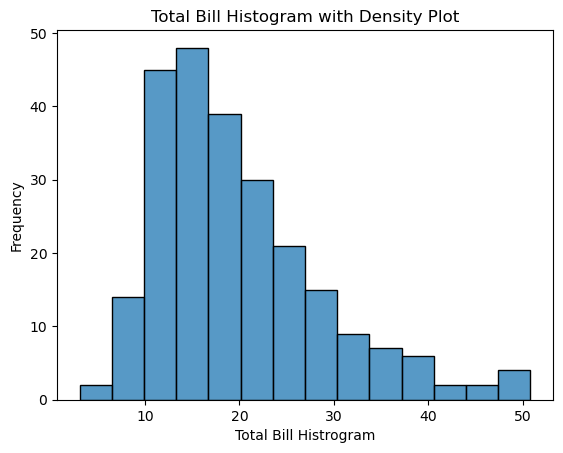

In [41]:
hist, ax = plt.subplots()
sns.histplot(tips["total_bill"], kde=False, ax=ax)
ax.set_title("Total Bill Histogram with Density Plot")
ax.set_xlabel("Total Bill Histrogram")
ax.set_ylabel("Frequency")
plt.show()

Plotagem de densidade (estimativa de densidade por Kernel)

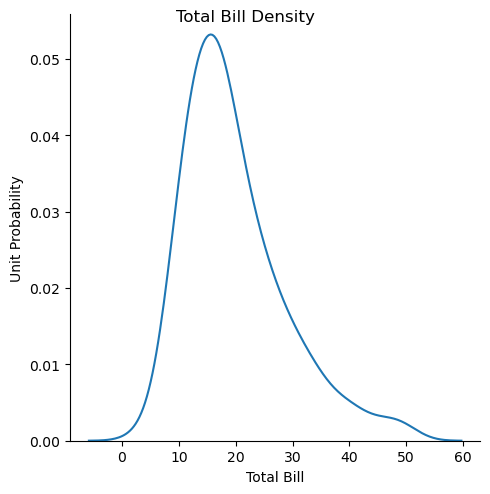

In [45]:
tips = sns.load_dataset("tips")

ax = sns.displot(tips["total_bill"], kind="kde")  # hist=False -> use kind="kde"
ax.fig.suptitle("Total Bill Density")              # título da figura
ax.set_axis_labels("Total Bill", "Unit Probability")  # labels de eixo
plt.show()